In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("dataset.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
data.shape

(197428, 14)

In [4]:
data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
data.isnull()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197424,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197425,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197426,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [8]:
df=data.dropna()
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [9]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0


In [10]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0


In [11]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [12]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html('datasetbefor.html')

C:\Users\zenil\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                                             |                                             | [  0%]   00:00 ->…

Report datasetbefor.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html('datasetafter.html')

                                             |                                             | [  0%]   00:00 ->…

Report datasetafter.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.743747,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800
std,1.330911,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,2.000000,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000
75%,4.000000,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


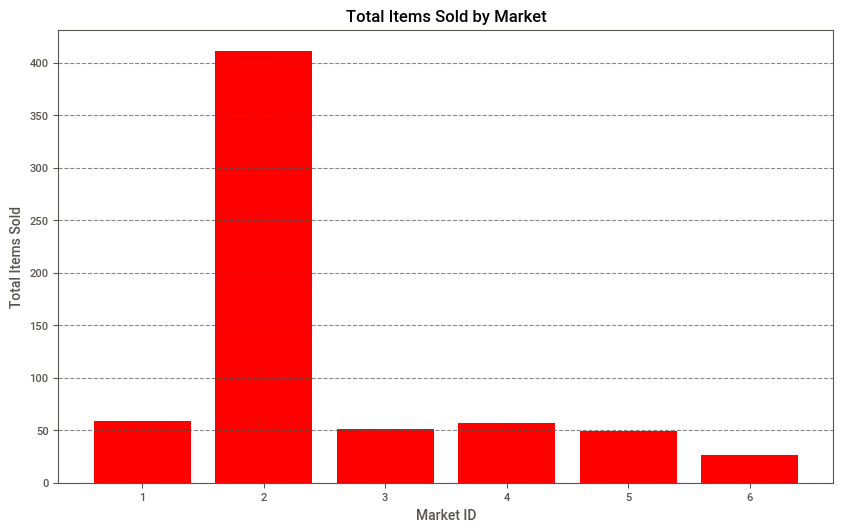

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

x=df['market_id']
y=df['total_items']
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='red')
plt.title('Total Items Sold by Market')
plt.xlabel('Market ID')
plt.ylabel('Total Items Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


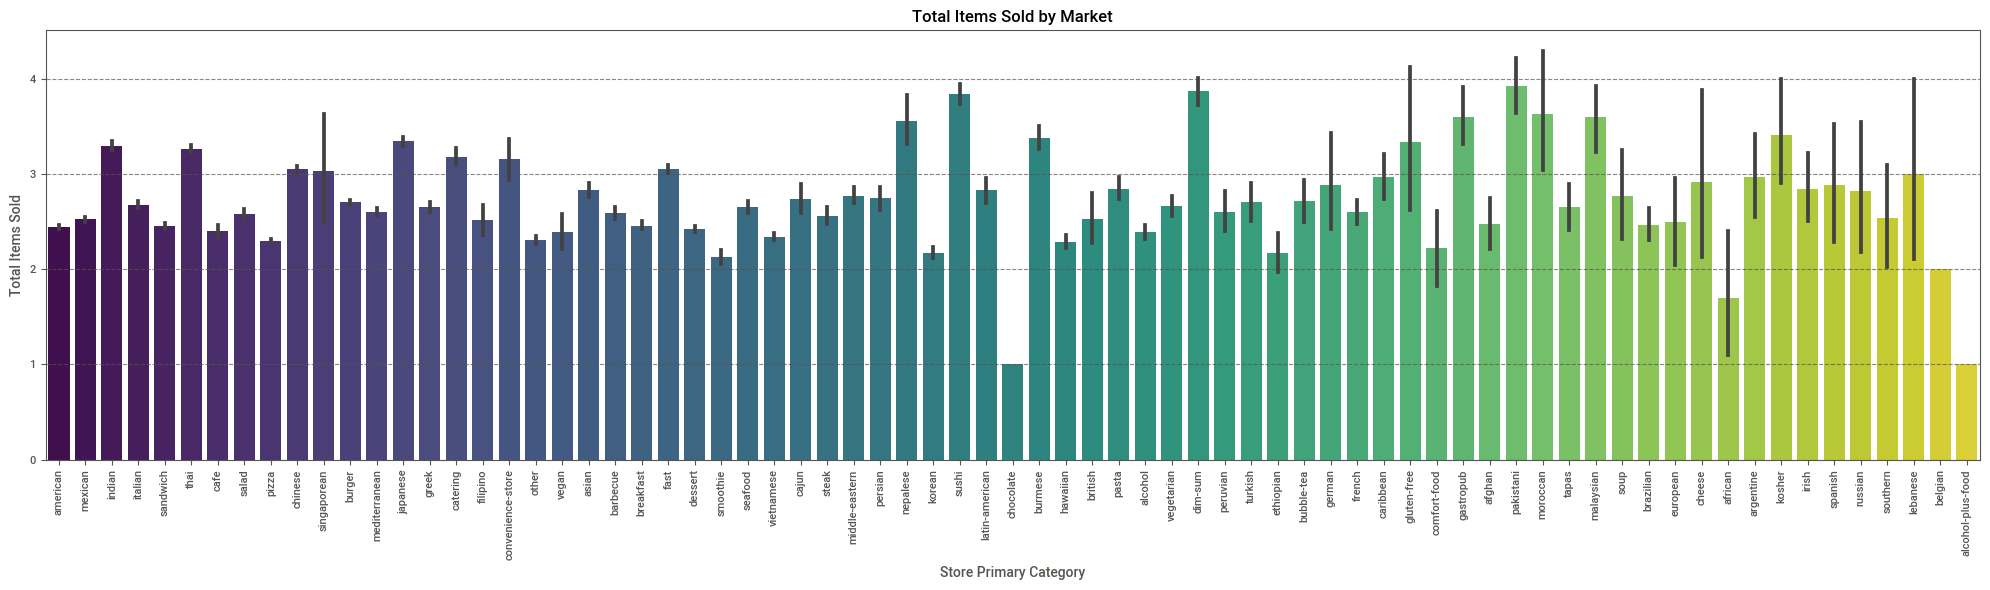

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.barplot(x='store_primary_category', y='num_distinct_items', data=df, palette='viridis')
plt.title('Total Items Sold by Market')
plt.xlabel('Store Primary Category')
plt.ylabel('Total Items Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

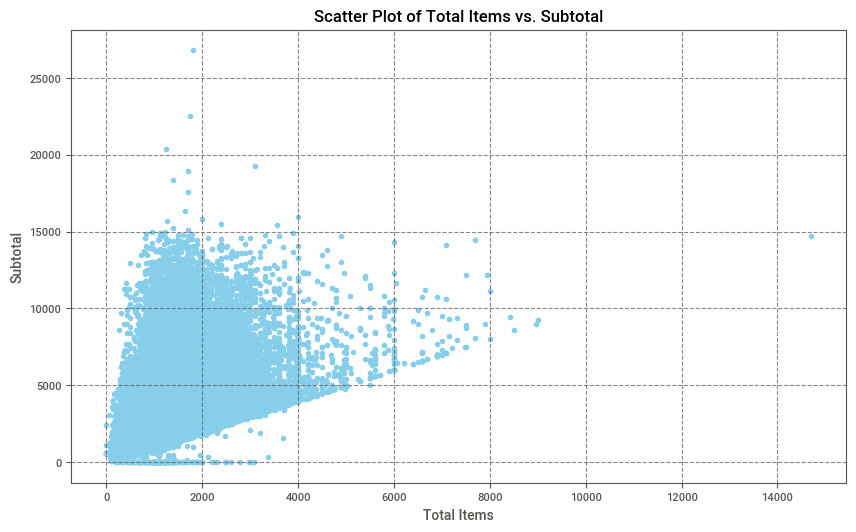

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

x=df['max_item_price']
y=df['subtotal']
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color='skyblue')
plt.title('Scatter Plot of Total Items vs. Subtotal')
plt.xlabel('Total Items')
plt.ylabel('Subtotal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

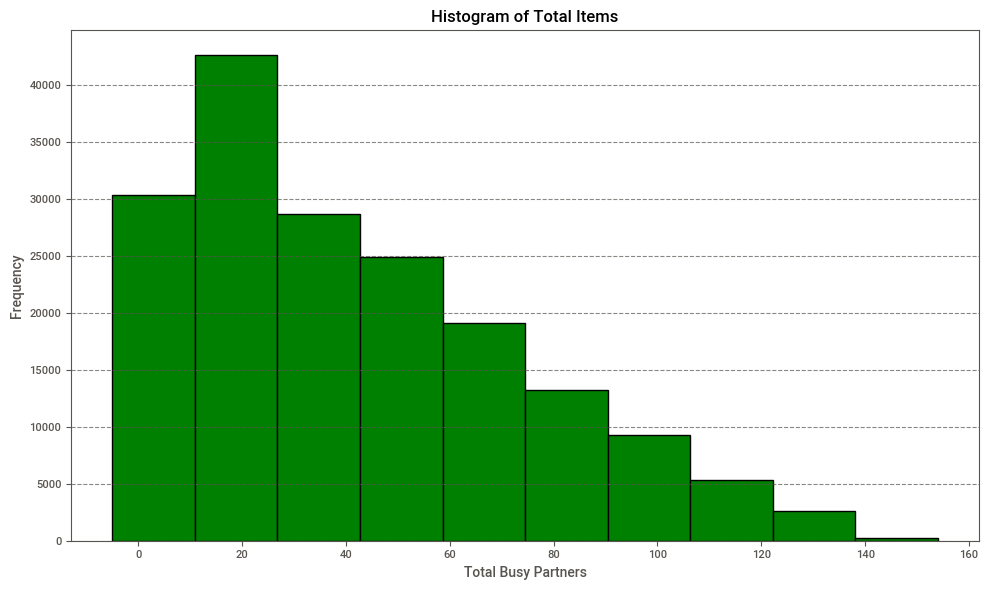

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['total_busy_partners'], bins=10,  color='green', edgecolor='black')
plt.title('Histogram of Total Items')
plt.xlabel('Total Busy Partners')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


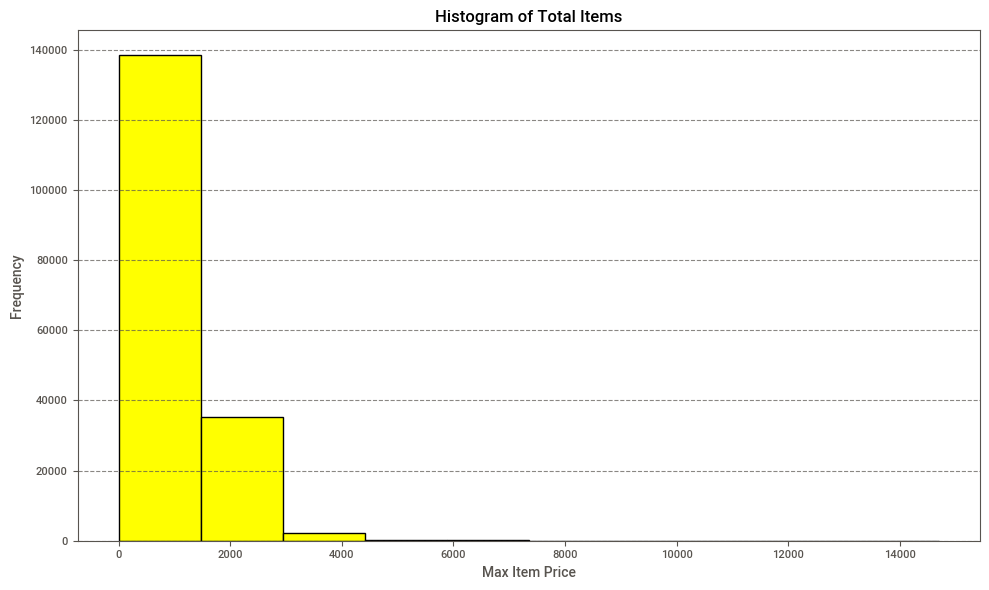

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['max_item_price'], bins=10, color='yellow', edgecolor='black')
plt.title('Histogram of Total Items')
plt.xlabel('Max Item Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

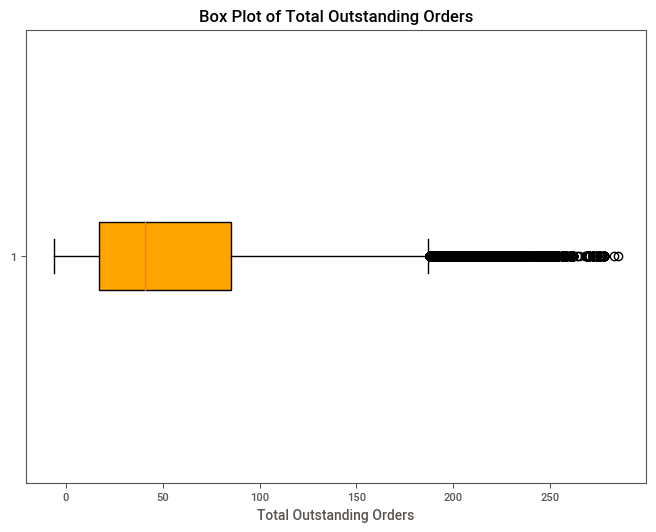

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.boxplot(df['total_outstanding_orders'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Box Plot of Total Outstanding Orders')
plt.xlabel('Total Outstanding Orders')
plt.show()


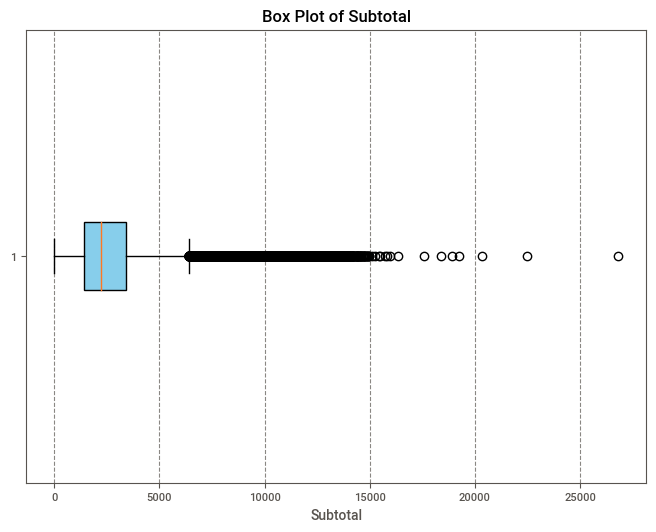

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.boxplot(df['subtotal'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Subtotal')
plt.xlabel('Subtotal')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

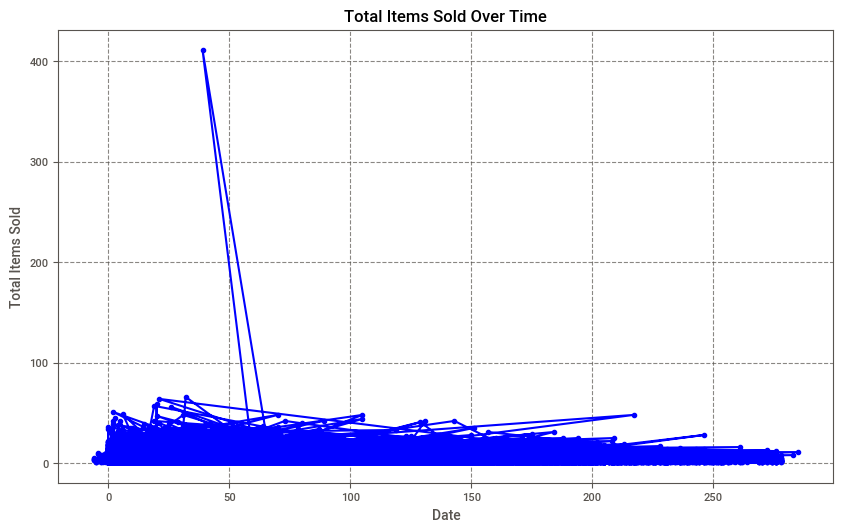

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['total_outstanding_orders'], df['total_items'], marker='o', color='blue', linestyle='-')
plt.title('Total Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


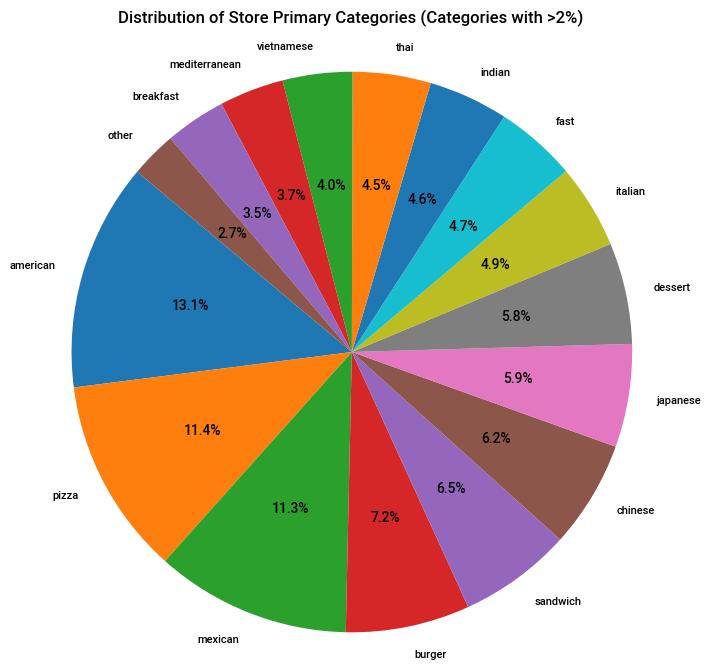

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = df['store_primary_category'].value_counts()
total_count = value_counts.sum()
filtered_data = value_counts[value_counts / total_count * 100 > 2]
plt.figure(figsize=(8, 8)) 
plt.pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Store Primary Categories (Categories with >2%)',pad=20)
plt.axis('equal') 
plt.show()


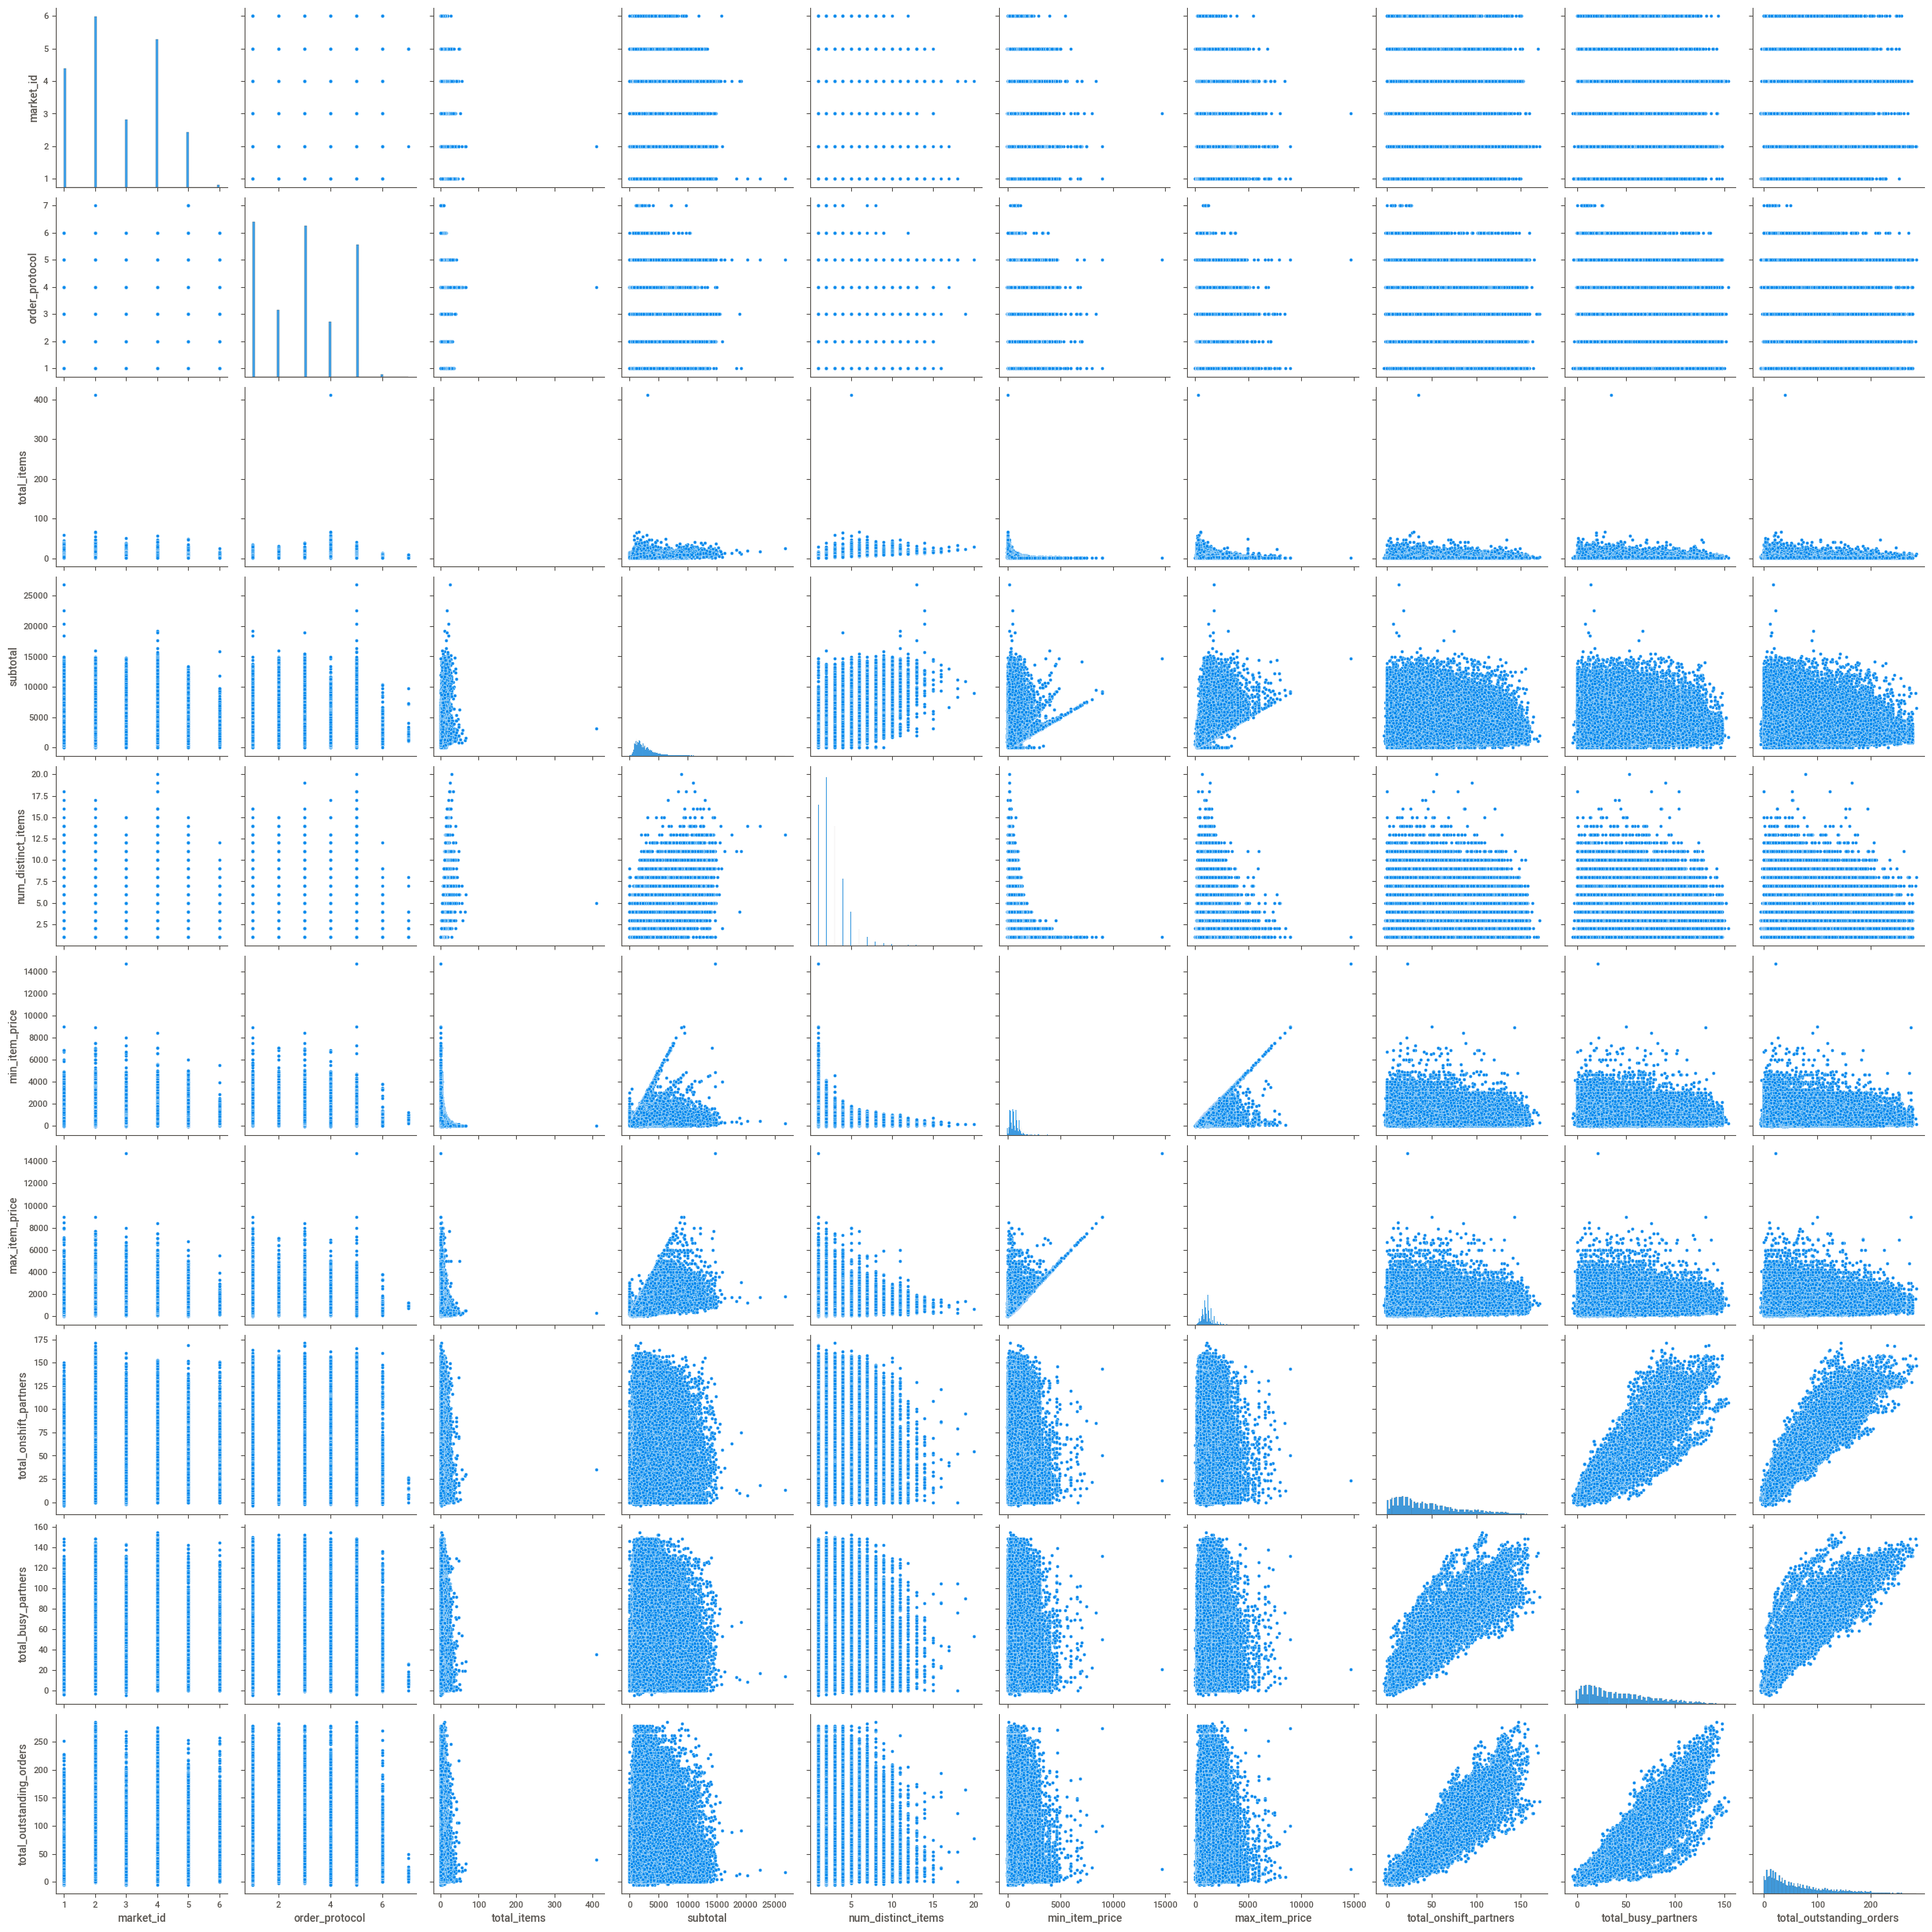

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


# Training and Testing


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price','max_item_price','total_onshift_partners',
        'total_busy_partners',]]
y = df[[ 'total_outstanding_orders']] 

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
print('x_train Shape:',x_train.shape)
print('x_test Shape:',x_test.shape)
print('y_train Shape:',y_train.shape)
print('x_test Shape:',x_test.shape)

x_train Shape: (140998, 7)
x_test Shape: (35250, 7)
y_train Shape: (140998, 1)
x_test Shape: (35250, 7)


In [29]:
x

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners
0,4,3441,4,557,1239,33.0,14.0
1,1,1900,1,1400,1400,1.0,2.0
8,4,4771,3,820,1604,8.0,6.0
14,1,1525,1,1525,1525,5.0,6.0
15,2,3620,2,1425,2195,5.0,5.0
...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0
197424,6,3010,4,405,825,12.0,11.0
197425,5,1836,3,300,399,39.0,41.0
197426,1,1175,1,535,535,7.0,7.0


In [30]:
y

,total_outstanding_orders
0,21.0
1,2.0
8,18.0
14,8.0
15,7.0
...,...
197423,23.0
197424,14.0
197425,40.0
197426,12.0


In [31]:
x_train.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners
10325,4,2438,3,189,500,53.0,93.0
169172,4,3930,4,922,1215,29.0,28.0
149678,2,1267,2,269,748,24.0,13.0
160615,3,3085,3,795,1195,48.0,31.0
158516,3,1343,3,275,649,86.0,59.0


In [32]:
y_train.head()

,total_outstanding_orders
10325,67.0
169172,54.0
149678,14.0
160615,45.0
158516,60.0


In [33]:
x_test.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners
179380,6,4790,5,550,1250,41.0,38.0
107694,5,5530,5,550,1495,32.0,27.0
76780,7,4495,5,295,1395,22.0,22.0
45585,3,1557,3,209,1119,55.0,54.0
116205,2,1195,2,150,1045,19.0,16.0


In [34]:
y_test.head()

,total_outstanding_orders
179380,66.0
107694,30.0
76780,17.0
45585,59.0
116205,16.0


# Linear  Regression

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 279.4364620169831
R-squared: 0.8991172146608417


# logistics Regressions

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 313.44870921985813
R-squared: 0.8868380360285932


# Random Forest Regression


Mean Squared Error: 149.78076769239257
R-squared: 0.945925807512809


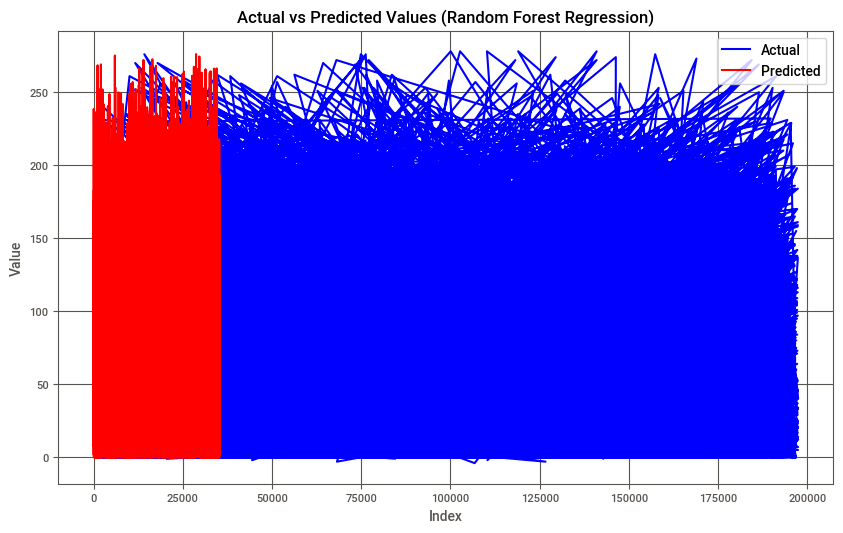

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()



# Decision tree Regression


Mean Squared Error: 273.1912915920011
R-squared: 0.9013718602530537


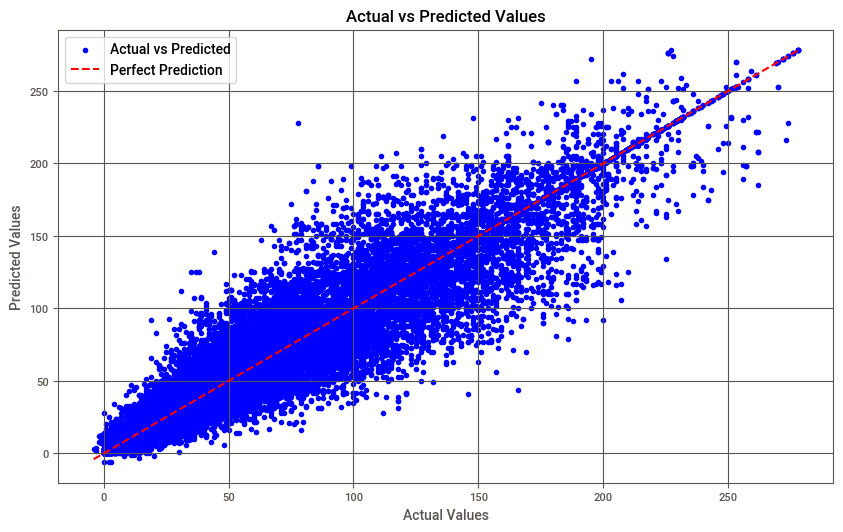

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import plot_tree

tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(x_train, y_train)

y_pred = tree_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()





# Sort the actual and predicted values based on the actual values
# sorted_indices = np.argsort(y_test)
# y_test_sorted = y_test.iloc[sorted_indices]
# y_pred_sorted = y_pred[sorted_indices]

# # Plot actual and predicted values as a line graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual')
# plt.plot(range(len(y_test_sorted)), y_pred_sorted, color='red', label='Predicted')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(tree_regressor, filled=True, feature_names=x.columns)
# plt.show()




# Ridge Regression

Mean Squared Error: 279.4363978130764
R-squared: 0.8991172378398817


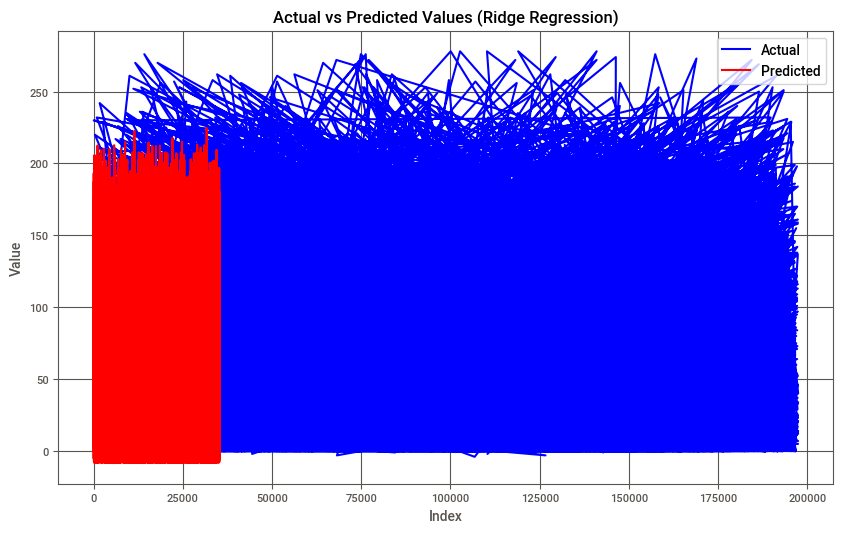

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

ridge_regressor = Ridge(alpha=1.0)  #

ridge_regressor.fit(X_train_scaled, y_train)

y_pred = ridge_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

# k-nearest neighbors (KNN) Regression

Mean Squared Error: 614.1805469503545
R-squared: 0.778267145846866


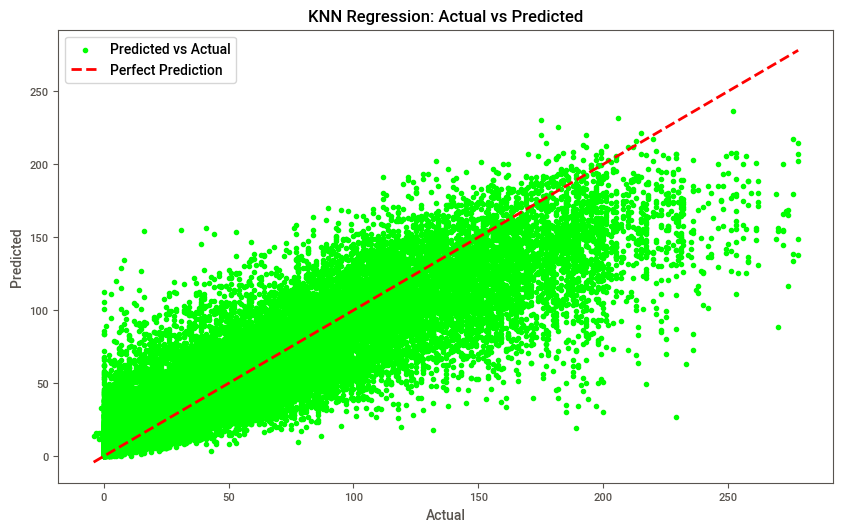

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score



knn_regressor = KNeighborsRegressor(n_neighbors=5)  
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='lime', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Actual vs Predicted')
plt.legend()
plt.show()


# Gradient boosting Regression

Mean Squared Error: 185.7528569501939
R-squared: 0.9329390822565493


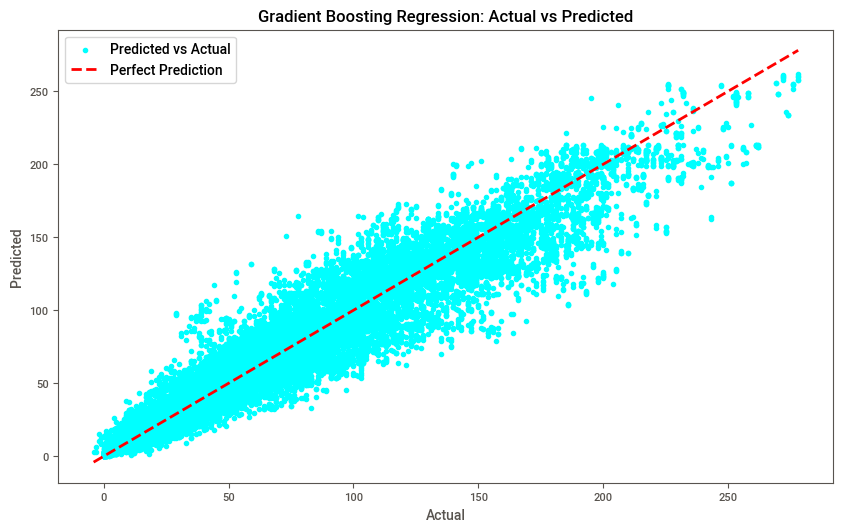

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_regressor.fit(x_train, y_train)

y_pred = gb_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='cyan', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.legend()
plt.show()


# Support Vector Regression

Mean Squared Error: 228.58374492697038
R-squared: 0.9174761779295396


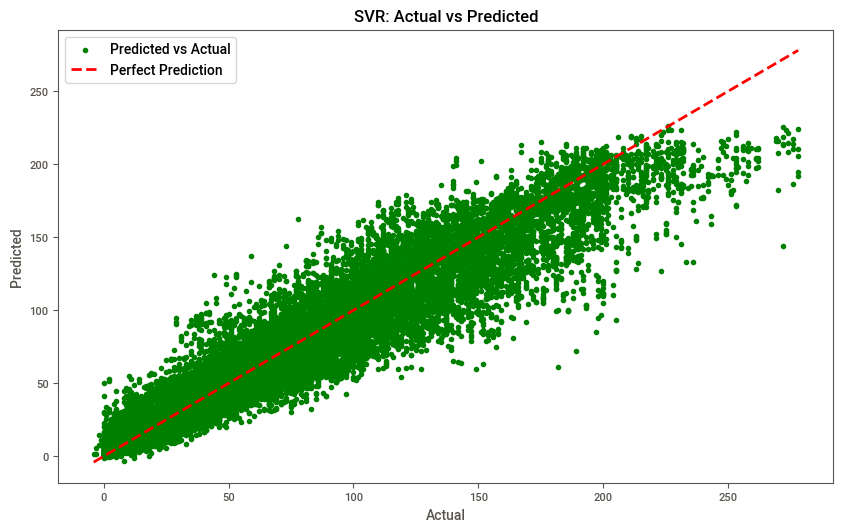

In [42]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

svr_regressor = SVR(kernel='rbf')  

svr_regressor.fit(X_train_scaled, y_train)

y_pred = svr_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()


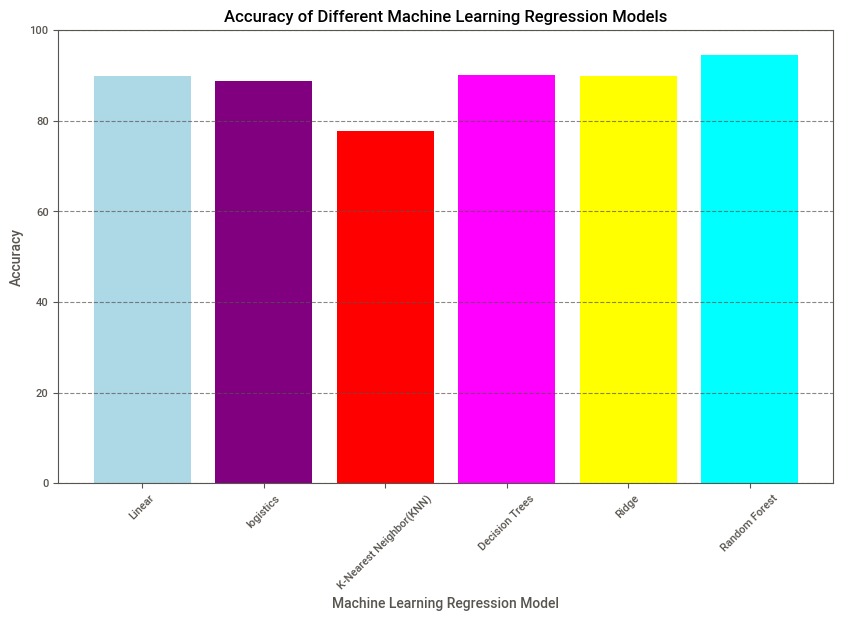

In [43]:
import matplotlib.pyplot as plt

model_learname=['Linear','logistics','K-Nearest Neighbor(KNN)', 'Decision Trees', 'Ridge', 'Random Forest']
accuracy=[89.91, 88.68,77.82,90.13,89.91,94.59]
color = ['lightblue', 'purple', 'red', 'magenta', 'yellow', 'cyan']
plt.figure(figsize=(10, 6))
plt.bar(model_learname, accuracy, color=color)
plt.title('Accuracy of Different Machine Learning Regression Models')
plt.xlabel('Machine Learning Regression Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
